In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os.path
from IPython.display import clear_output
import shutil

In [15]:
def main():
    pastas = ["2inch_stickout", "2p5inch_stickout", "3p5inch_stickout", "4p5inch_stickout"]
    path = 'ic-cnc-main/split_cutting_tests_processed/'
    path_prontos = 'ic-cnc-main/prontos/'
    prontos = {}

    for idx2, i in enumerate(pastas):
        prontos[i] = [j[2:] for j in listdir(f'{path_prontos}{i}')]
        todos = [j for j in listdir(f'{path}{i}')]# if j[0] == 's' and
                                                  #   '_noise_added' not in j and
                                                  #   j[2:] not in prontos[i]]
        n = len(todos)
        for idx, j in enumerate(todos):
            print(f'Pasta {idx2+1}/{len(pastas)}:', i)
            print(f'Arquivo {idx+1+int(len(prontos[i])/2)}/{len(todos)+int(len(prontos[i])/2)}:', j)
            print('')
            plot = pd.read_csv(f'{path}/{i}/{j}')
            fig, ax = plt.subplots(1,2, figsize = (10,4))

            ax[0].plot(plot['t'], plot['y'])
            fft = np.fft.fft(plot['y'])
            fftfreq = np.fft.fftfreq(len(plot['t']), plot['t'][1] - plot['t'][0])
            ax[1].plot(fftfreq[10:int(len(fft)/2)], np.abs(fft[10:int(len(fft)/2)])/len(fft), c = 'k')
            fig.suptitle(j)


            plt.show()
            print('c = Chatter\ns = Sem chatter')
            classe = input('')
#             shutil.copyfile(f'{path}/{i}/{j}', f'{path_prontos}/{i}/{classe}{j[1:]}')
#             shutil.copyfile(f'{path}/{i}/{j[:-4]}_noise_added.csv', f'{path_prontos}/{i}/{classe}{j[1:-4]}_noise_added.csv')
            clear_output()
#             print('Último arquivo:', f'{path_prontos}/{i}/{classe}{j[1:]}', '\n')



Pasta 1/4: 2inch_stickout
Arquivo 5/312: c_770_002_2_split_1_noise_added.csv



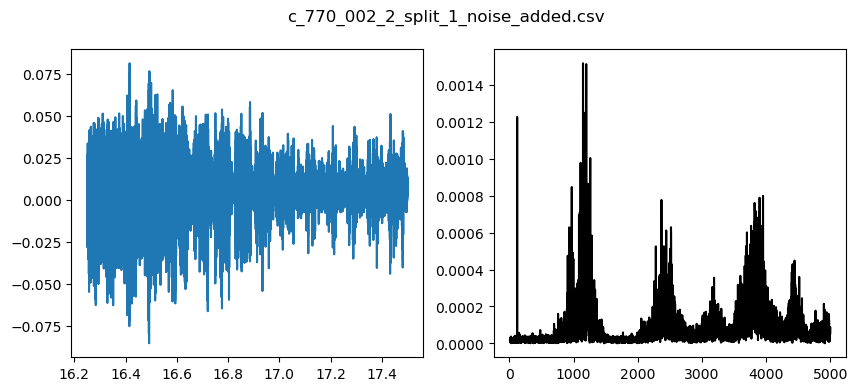

c = Chatter
s = Sem chatter


KeyboardInterrupt: Interrupted by user

In [16]:
main()